<a href="https://colab.research.google.com/github/DineshDhakar1997/GRIP/blob/master/k_means_clustering%20and%20silhouette%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By Dinesh Dhakar

## Task : **Finding Minimum number of Clusters and Its Validation using SILHOUETTE ANALYSIS**

#What is Clustering?

It is basically a type of unsupervised learning method. An unsupervised learning method is a method in which we draw references from datasets consisting of input data without labeled responses. 

**Importing the basic packages**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set()

**Importing the iris flower data from pandas datasets using load_iris()**

In [3]:
from sklearn import datasets
iris_dataset = datasets.load_iris()
iris_data = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
iris_data.columns,iris_data

(Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'],
       dtype='object'),
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149    

###null count analysis before modelling to keep check

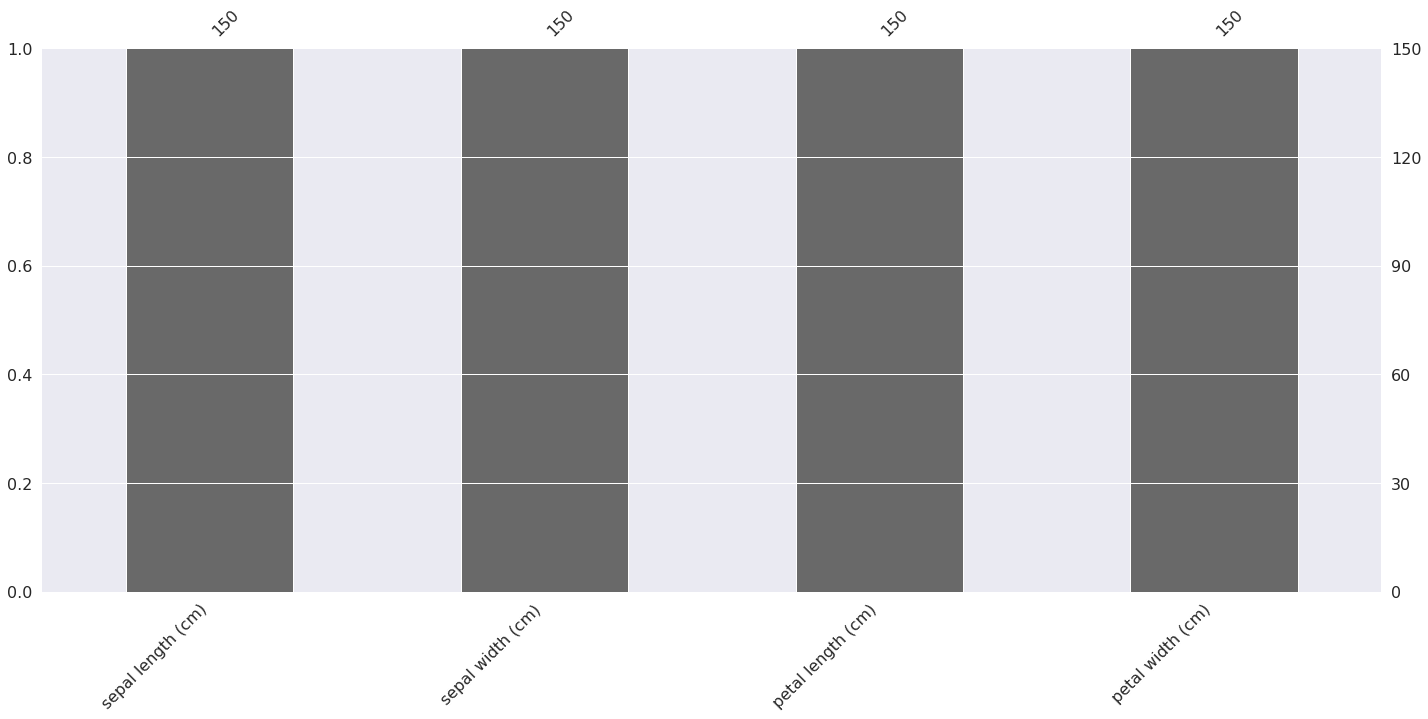

In [4]:
import missingno as msno
p=msno.bar(iris_data)

 **Our iris dataset has only feature columns so defining X so that original data remains as it is**

In [27]:
X=iris_data
X=np.array(X)

## DETERMINING THE OPTIMAL NUMBER OF CLUSTERS

### 1. ELBOW METHOD
This is probably the most well-known method for determining the optimal number of clusters. It is also a bit naive in its approach.
Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.
### 2. SILHOUETTE ANALYSIS : 
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].Where 1 means that points are very close to their own cluster and far from other clusters, whereas -1 indicates that points are close to the neighboring clusters.


## **Why do we need SILHOUETTE ANALYSIS when we have Elbow Method ?**

The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.
Therefore, the Elbow Method and the Silhouette Method are not alternatives to each other for finding the optimal K. Rather they are tools to be used together for a more confident decision.

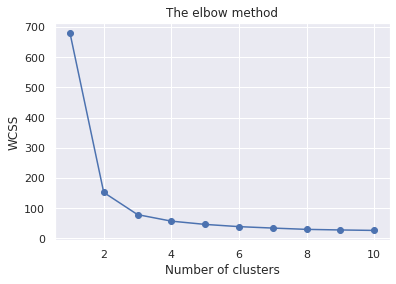

In [6]:
# Finding the optimum number of clusters for k-means classification


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**Our graph shows that 'Within Cluster Sum of Squares' has an elbow at numbers of clusters=2,3,4**

## Here when number of clusters is less,  WCSS will be high. When number of clusters is high, points in one cluster are very close to points in the neighboring clusters, resulting in overlaping of clusters which is also undesired. So, we will find optimum number of clusters.

**We will use PCA to find features with high variance so that we can visualise the the clusters properly**

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit(X).transform(X)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [11]:
pca = PCA(n_components=3)
X_3 = pca.fit(X).transform(X)

In [16]:
# Finding the optimum number of clusters for k-means classification


from sklearn.cluster import KMeans
WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_3)
    WCSS.append(kmeans.inertia_)

In [17]:
pca=PCA(n_components=2)
X_2=pca.fit_transform(X)

In [18]:
# Finding the optimum number of clusters for k-means classification


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_2)
    wcss.append(kmeans.inertia_)

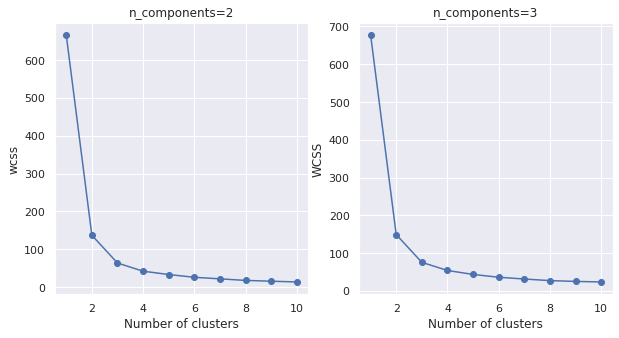

In [19]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss)
plt.title('n_components=2')
plt.xlabel('Number of clusters')
plt.ylabel('wcss') # Within cluster sum of squares

plt.subplot(122)
plt.plot(range(1, 11), WCSS)
plt.scatter(range(1, 11), WCSS)
plt.title('n_components=3')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**From above PCA we got to know that 2 components are enough to visualise the data.**

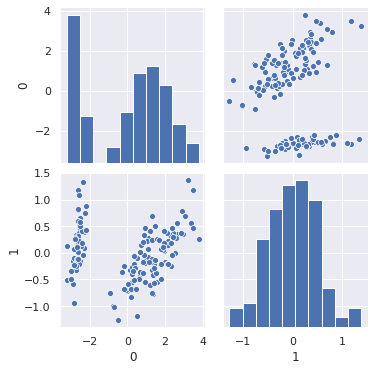

In [20]:
sns.pairplot(pd.DataFrame(X_2))

# Now we will find optimum numbers of clusters
#### We want minimum value of WCSS to keep clusters homogeneous at the same time we larger value of SILHOUETTE COEFFICIENT so that points of one cluster are close to each other and away from neighbouring clusters.

In [33]:
range_n_clusters = [2, 3, 4,5]

Below code is available on sklearn website

For n_clusters = 2 The average silhouette_score is : 0.7056703225091883
For n_clusters = 3 The average silhouette_score is : 0.5976764219497545
For n_clusters = 4 The average silhouette_score is : 0.5591106064458163
For n_clusters = 5 The average silhouette_score is : 0.5509643081192235


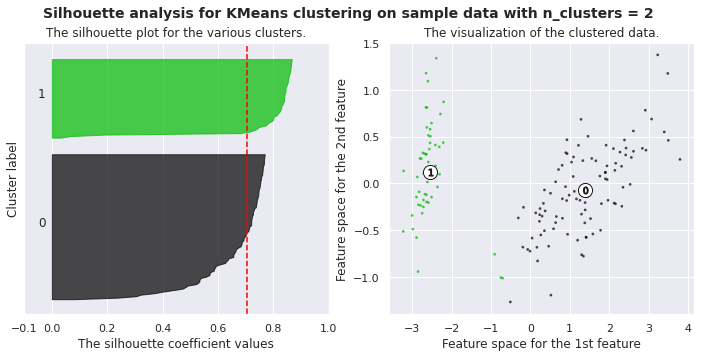

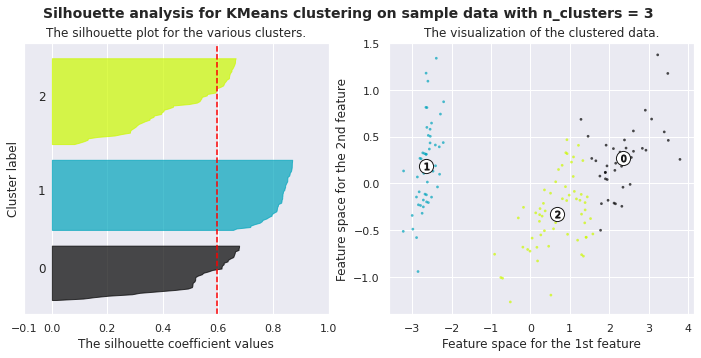

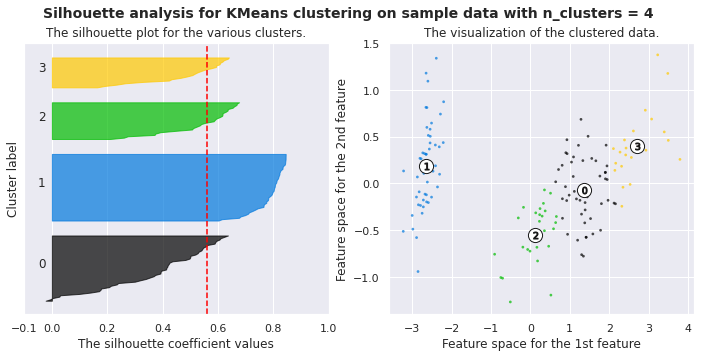

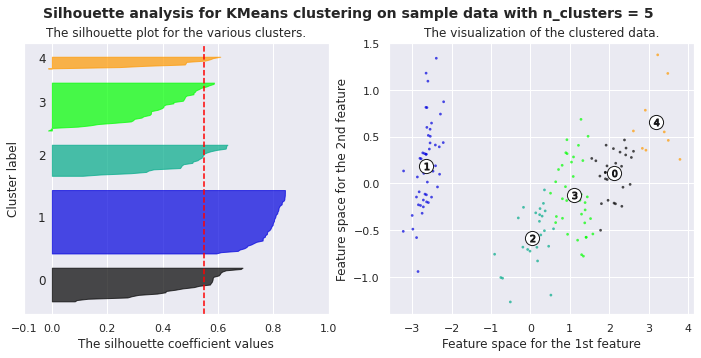

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12,5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_2[:, 0], X_2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#Result : The Silhouette cofficient is positive or we say more than 0 for all cluster when number of clusters are less than 3 or equal to 3. WCSS is also decreasing as number of clusters are increasing so 
# our optimum number of clusters will be **3** as after it Silhouette cofficient becomes negative for 0 labelled (total 4 clusters) and 3,4 labelled (5 clusters) respectively.